**Singular Valued Decomposition (SVD)**

**Introduction**

The Singular Value Decomposition (SVD) is a basic tool frequently used in
Numerical Linear Algebra and in many applications, which generalizes the
Spectral Theorem from symmetric n × n matrices to general m × n matrices.
We introduce the reader to some of its beautiful properties, mainly related to
the Eckart-Young Theorem, which has a geometric nature. The implementation of a SVD algorithm in the computer algebra software Macaulay2 allows
a friendly use in many algebro-geometric computations.

 Let A be an n × d matrix  in d-dimensional space. 
 Consider where subspace is 1-d dimensional 
 For k = 1, 2, 3,..., for the collection of n data points, the singular value decomposition yields the best-fitting k-dimensional subspace.</b>

Let's start with a one-dimensional subspace, such as a line through the origin.
Next the best-fitting k-dimensional subspace may be discovered by k applications of the best fitting line approach, where the best fit line perpendicular to the preceding i-1 lines is found on the i th iteration.When k approaches the rank of the matrix, we have a precise breakdown of the matrix termed the singular value decomposition from these processes.</b>

SVD of  a matrix A with real elements is the factorization of A into the product of three matrices, A = UDV T, where the columns of U and V are orthonormal and the matrix D is diagonal with positive real values. The unit length vectors are represented by V's columns. The coordinates of a row of U will be fractions of the corresponding row of A along each of the lines.

<b>Explanation</b>



Assume that we have a matrix A (nxm) with rank r. Dimensions of rowspace and column space can be atmost n, m respectively. However as the rank of A is r there are excatly r linearly independent row vectors and column vectors, thus the dimension of rowspace and colspace is r. 

<b>This means that there are r basis vectors for the rowspace and columnspace.</b>

****Note: these basis vectors of rowspace, column space can be found out from the  corresponding echelon matrix using non-zero rows and pivot columns.


Matrix can be viewed as an operator of linear transformation, each column of a matrix represents a trasformed basis vector. let v be a vector in rowspace of A, then A*v gives a vector in the column space of A. i.e. A v=σ u, σ is a constant.

For the rowspace,there exists some orthogonal basis (say v). we are intrested in finding such basis that gets transformed by A to an orhtogonal basis in colspace.

****Note: For a subspace formed by span of vectors, there can be multiple sets of basis vectors. Using algorithm given by Gram-schmidt, an orthogonal basis vectors for the same space can be found using some set of basis vectors.

let v1, v2, v3... vr be that orthogonal basis vectors of the rowspace. u1, u2, u3,...,ur be the transformed vectors that form an orhtogonal basis of the column space,<br><br>
 i.e. <br><br><br>
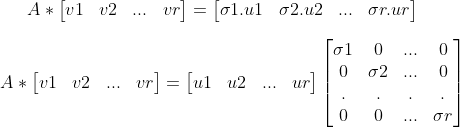


Note:*** generally in this Σ matrix, σ values are kept in decreasing order, as a consequence the order of v vectors in V and u vectors in V is also changed to maintain the correspondence.
 
<br>
<b>A V=U 𝚺</b>
<br>multiply by V<sup>  -1</sup> on both sides 
<br>A V V <sup>  -1</sup> =U 𝚺 V<sup>  -1</sup>
<br> A = U 𝚺 V<sup>  -1</sup>
<br> U and V are the collection of orthogonal basis vectors, so U and V are othrogonal matrices. So V V<sup>T</sup> = I, i.e. V<sup>-1</sup> = V<sup>T</sup>
<br> <b>A = U 𝚺 V<sup>  T</sup></b>

if we generalize this equation considering all vectors of row and column space, we get
<br><br>


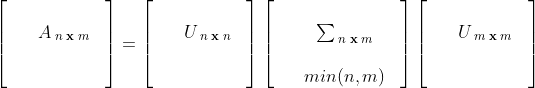
<br><br>
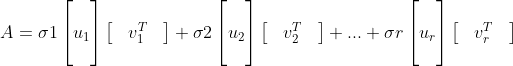


 Here u<sub>i</sub>'s are called left singluar vectors and v<sub>i</sub>'s are called right singular vectors and σ<sub>i</sub>'s are called singular 
<br>




 
<br><b>*** Note:when the rank of A is r ( r <= min(n,m)) then we need only first r vectors of U, V. we are able to take only these vectors by manipulating zeroes in matrix 𝚺.</b>


<br><br>
Now let us consider A A<sup>  T</sup>
<br> A A<sup>  T</sup> = (U 𝚺 V<sup>  T</sup>) (U 𝚺 V<sup>  T</sup>)<sup>T</sup>
<br>= U 𝚺 V<sup>  T</sup> V</sup> 𝚺<sup>T</sup> U<sup>T</sup>
<br>
as 𝚺 is a diagnol matrix 𝚺<sup>T</sup>=𝚺
<br>= U 𝚺 <sup>2</sup> U<sup>T</sup>

<b>Thus u<sub>i</sub>'s  are eigen vectors of A A<sup>T</sup> and σ<sub>i</sub>'s are the square roots of eigen values of A A<sup>T</sup></b>

<br>

Now let us consider A<sup>  T</sup> A

A<sup>  T</sup> A = (U 𝚺 V<sup>  T</sup>)<sup>T</sup> (U 𝚺 V<sup>  T</sup>)
<br> = V 𝚺<sup>T</sup> U <sup>T</sup> U 𝚺 V<sup>  T</sup>
<br> = V 𝚺<sup>T</sup> U <sup>T</sup> U 𝚺 V<sup>  T</sup>
<br> = V 𝚺<sup>2</sup> V<sup>T</sup>


<b>Thus v<sub>i</sub>'s  are eigen vectors of A<sup>T</sup> A and σ<sub>i</sub>'s are the square roots of eigen values of A<sup>T</sup> A</b>

 ***Property: Matrices (AB) and (BA) have same eigen values.



<br>


<br><b>Top K Truncated SVD:</b>

use first k vectors of U, V and the corresponding spectral values (top k x k submatrix of Σ )  





**Implementation of SVD**

In [5]:
import numpy as np
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)                       # v here=v(Trans) in svd transpose actually 
U,D,V

(array([[-0.69366543,  0.59343205, -0.40824829],
        [-0.4427092 , -0.79833696, -0.40824829],
        [-0.56818732, -0.10245245,  0.81649658]]),
 array([10.25142677,  2.62835484]),
 array([[-0.88033817, -0.47434662],
        [ 0.47434662, -0.88033817]]))

**Applications of Singular Value Decomposition (SVD)**</b>

Image Compression</b>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#This line is required to display visualizations in the browser
%matplotlib inline

In [7]:
from skimage import data
from skimage.color import rgb2gray
from ipywidgets import interact,interactive,interact_manual

In [8]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [9]:
from numpy.linalg import svd

In [10]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

In [11]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [12]:
import numpy as np 
def compute_k_max(img_name):
  """
    utility function for calculating max value of the slider range
  """
  img = gray_images[img_name]
  m,n = img.shape
  return m*n/(m+n+1)

#set up the widgets
import ipywidgets as widgets

list_widget = widgets.Dropdown(options=list(gray_images.keys()))
int_slider_widget = widgets.IntSlider(min=1,max=compute_k_max('cat'))
def update_k_max(*args):
  img_name=list_widget.value
  int_slider_widget.max = compute_k_max(img_name)
list_widget.observe(update_k_max,'value')

In [13]:
interact(compress_show_gray_images,img_name=list_widget,k=int_slider_widget);

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'camera', 'coin', 'clock', 'bl…

Image Recovery</b>

The process of filling in the missing items in a partly seen matrix is known as matrix completion. A well-known example of this is the Netflix dilemma.If customer I has viewed movie j and is otherwise unavailable, we'd want to anticipate the remaining entries in order to offer appropriate suggestions to consumers on what to watch next, given a ratings matrix in which each entry (i,j) indicates the rating of movie j by customer i.

The fact that most users have a pattern in the movies they view and the ratings they give to these movies is a key factor in resolving this issue. As a result, the ratings matrix contains very little unique data. This implies that a low-rank matrix would be able to approximate the matrix well enough.

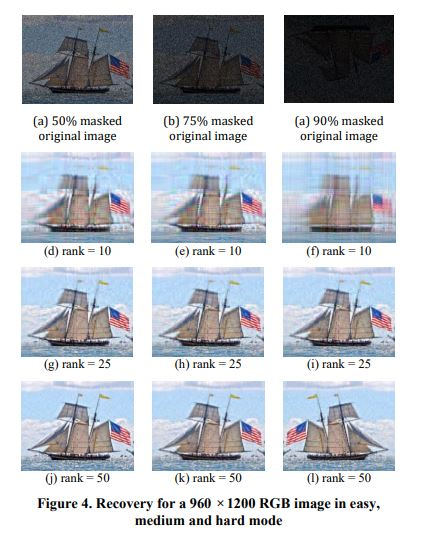

Reference :https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/

Eigenfaces</b>

The encoding is accomplished by expressing each face in the new face space as a linear combination of the specified eigenfaces.
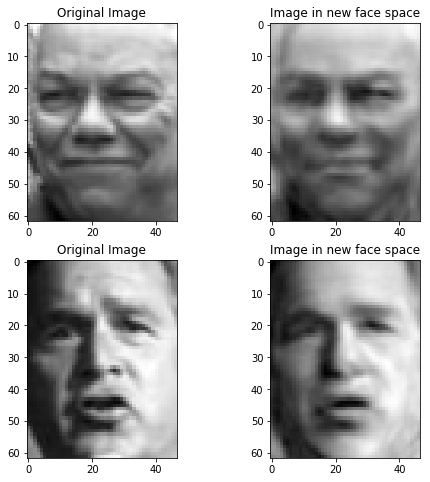

Spectral Clustering</b>

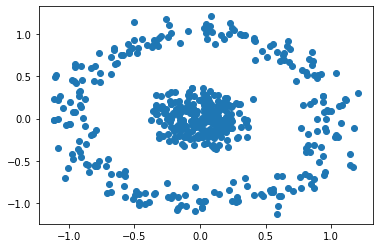

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


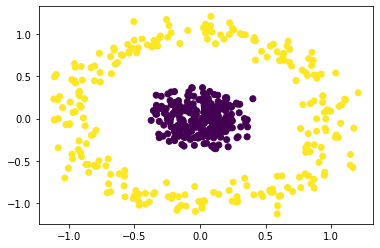

In [4]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()
# source :Gitgub - rawspectral_clustering.py 

<b>References</b>:

https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-29-singular-value-decomposition/

"Spectral Learning on Matrices and Tensors" textbook